In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation 
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.99, random_state=1)

In [7]:
x_train.shape

(600, 28, 28)

In [8]:
x_cv.shape

(59400, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)
x_cv = tf.keras.utils.normalize(x_cv)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(x_cv[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

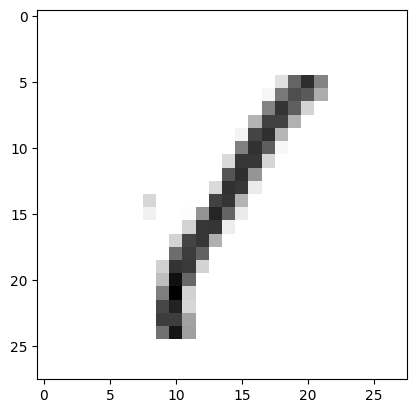

In [13]:
plt.imshow(x_train[0],cmap = plt.cm.binary)

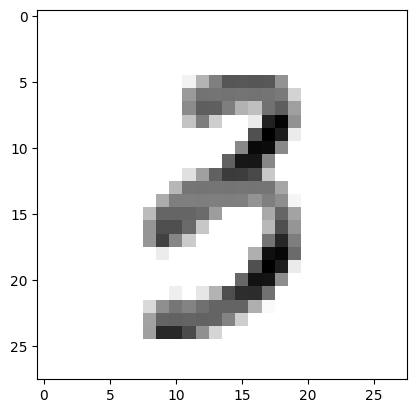

In [14]:
plt.imshow(x_cv[0],cmap = plt.cm.binary)

In [15]:
print(y_cv[0])

3


In [16]:
print(y_train[0])

1


In [17]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)     

In [18]:
x_cv = x_cv.reshape(x_cv.shape[0],-1)

In [19]:
x_train.shape

(600, 784)

In [20]:
x_test.shape

(10000, 784)

In [21]:
y_cv.shape

(59400,)

In [22]:
x_cv.shape

(59400, 784)

Finished lambda = 0.0
Finished lambda = 0.001
Finished lambda = 0.01
Finished lambda = 0.05
Finished lambda = 0.1
Finished lambda = 0.2
Finished lambda = 0.3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


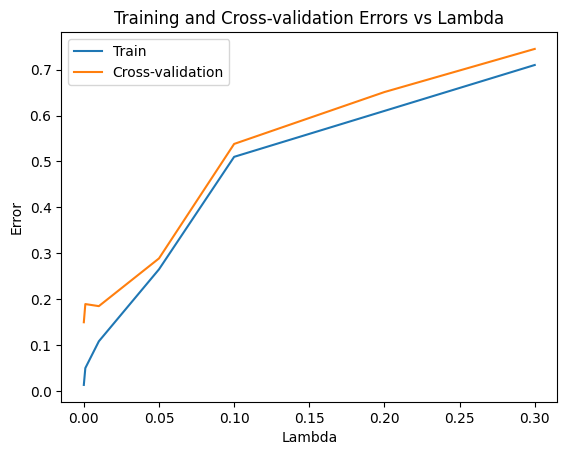

In [23]:
tf.random.set_seed(1234)

# Define lambdas and initialize models list
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models = [None] * len(lambdas)

# Train models with different lambda values
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] = Sequential([
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(10, activation='linear')
    ])
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        x_train, y_train,
        epochs=10,
        verbose=0  # Add verbose=0 to suppress output for brevity
    )
    print(f"Finished lambda = {lambda_}")

# Define eval_cat_error function
def eval_cat_error(y, yhat):
    error = np.mean(y != yhat)
    return error

# Define plot_iterate function
def plot_iterate(lambdas, models, x_train, y_train, x_cv, y_cv):
    train_errors = []
    cv_errors = []

    for model in models:
        # Predict on training data
        prediction_train = model.predict(x_train)
        yhat_train = np.argmax(prediction_train, axis=1)
        
        # Compute training error
        train_error = eval_cat_error(y_train, yhat_train)
        train_errors.append(train_error)
        
        # Predict on cross-validation data
        prediction_cv = model.predict(x_test)
        yhat_cv = np.argmax(prediction_cv, axis=1)
        
        # Compute cross-validation error
        cv_err = eval_cat_error(y_test, yhat_cv)
        cv_errors.append(cv_err)
    
    # Plot the errors
    plt.plot(lambdas, train_errors, label='Train')
    plt.plot(lambdas, cv_errors, label='Cross-validation')
    plt.xlabel('Lambda')
    plt.ylabel('Error')
    plt.title('Training and Cross-validation Errors vs Lambda')
    plt.legend()
    plt.show()

# Assuming x_train, y_train, x_cv, y_cv are defined and properly preprocessed
plot_iterate(lambdas, models, x_train, y_train, x_cv, y_cv)